# Validate candlestick patterns

In [1]:
from src import utils as u
import pandas as pd
import random
import mplfinance as mpf
import os
import numpy as np
import datetime
from configparser import ConfigParser

In [2]:
configur = ConfigParser()
print (configur.read('config_candlestick_patterns.ini'))
#print ("Sections : ", configur.sections())

['config_candlestick_patterns.ini']


## Get the data

### Parameters

In [3]:
asset_ticket = "BTCUSDT"
timestamp = "1d"
start_date = "1 Sep, 2017"
end_date = "31 Dec, 2022"

In [4]:
input_data_path = '../data'
input_data_filename = "binance" + \
                  "_" + asset_ticket + \
                  "_" + timestamp + \
                  "_from_" + datetime.datetime.strptime(start_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_to_" + datetime.datetime.strptime(end_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_candlesticks_signals_raw"
input_data_extension = ".csv"
full_path_input_data = os.path.join(input_data_path, input_data_filename + input_data_extension)

In [5]:
df = pd.read_csv(full_path_input_data)

In [6]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR,CDLENGULFING,CDLENGULFINGBULLISH,CDLENGULFINGBEARISH
0,1504224000000,4689.89,4885.55,4654.88,4834.91,560.666366,1504310399999,2.665166e+06,4000,118.660103,...,0,0,0,0,0,0,0,0,0,0
1,1504310400000,4796.16,4939.19,4286.87,4472.14,929.148595,1504396799999,4.257724e+06,7475,379.199863,...,0,0,0,0,0,0,0,0,0,0
2,1504396800000,4508.50,4714.76,4298.33,4509.08,691.216198,1504483199999,3.121053e+06,6022,258.934536,...,0,0,0,0,0,0,0,0,0,0
3,1504483200000,4505.00,4527.49,3972.51,4100.11,1394.644614,1504569599999,5.909947e+06,9317,578.600851,...,0,0,0,0,0,0,0,0,0,0
4,1504569600000,4106.97,4484.99,3603.00,4366.47,1228.938157,1504655999999,5.083453e+06,10084,533.476065,...,0,0,0,0,0,0,0,0,0,0


## Set the index on the dataframe

In [7]:
df.index = pd.DatetimeIndex(df['formatted_open_time'])

## Verify that the candlesticks are definitely showing a trend (down/up)

### Set some parameters

In [8]:
window_size = configur.getint('candlestick_patterns', 'window_size')
slope_size = configur.getint('candlestick_patterns', 'slope_size')

### Get the dates from the bullish candlesticks patterns

In [9]:
list_dates_invertedhammer = df[df['CDLINVERTEDHAMMER'] == 100]['formatted_open_time'].to_list()
list_dates_hammer = df[df['CDLHAMMER'] == 100]['formatted_open_time'].to_list()
list_dates_piercing = df[df['CDLPIERCING'] == 100]['formatted_open_time'].to_list()
list_dates_morningstar = df[df['CDLMORNINGSTAR'] == 100]['formatted_open_time'].to_list()
list_dates_bullishengulfing = df[df['CDLENGULFINGBULLISH'] == 100]['formatted_open_time'].to_list()

In [10]:
list_all_dates = df['formatted_open_time'].to_list()

#### Get the amount of candlesticks patterns (before check)

In [11]:
print(f'BEFORE: number of inverted hammer:{len(list_dates_invertedhammer)}')
print(f'BEFORE: number of hammer:{len(list_dates_hammer)}')
print(f'BEFORE: number of piercing:{len(list_dates_piercing)}')
print(f'BEFORE: number of morning star:{len(list_dates_morningstar)}')
print(f'BEFORE: number of bullish engulfing:{len(list_dates_bullishengulfing)}')

BEFORE: number of inverted hammer:3
BEFORE: number of hammer:48
BEFORE: number of piercing:0
BEFORE: number of morning star:2
BEFORE: number of bullish engulfing:82


#### Run the checks to identify the real candlesticks with reversal

In [12]:
list_validate_dates_invertedhammer = []
list_new_sign_invertedhammer = []
for date in list_dates_invertedhammer:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_invertedhammer.append(date)
        list_new_sign_invertedhammer.append(1)
    else:
        list_new_sign_invertedhammer.append(0)

In [13]:
list_validate_dates_hammer = []
list_new_sign_hammer = []
for date in list_dates_hammer:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_hammer.append(date)
        list_new_sign_hammer.append(1)
    else:
        list_new_sign_hammer.append(0)        

In [14]:
list_validate_dates_piercing = []
list_new_sign_piercing = []
for date in list_dates_piercing:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_piercing.append(date)
        list_new_sign_piercing.append(1)
    else:
        list_new_sign_piercing.append(0)         

In [15]:
list_validate_dates_morningstar = []
list_new_sign_morningstar = []
for date in list_dates_morningstar:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_morningstar.append(date)
        list_new_sign_morningstar.append(1)
    else:
        list_new_sign_morningstar.append(0)          

In [16]:
list_validate_dates_bullishengulfing = []
list_new_sign_bullishengulfing = []
for date in list_dates_bullishengulfing:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_bullishengulfing.append(date)
        list_new_sign_bullishengulfing.append(1)
    else:
        list_new_sign_bullishengulfing.append(0)          

#### Get the amount of candlesticks patterns (after check)

In [17]:
print(f'AFTER: number of inverted hammer:{len(list_validate_dates_invertedhammer)}')
print(f'AFTER: number of hammer:{len(list_validate_dates_hammer)}')
print(f'AFTER: number of piercing:{len(list_validate_dates_piercing)}')
print(f'AFTER: number of morning star:{len(list_validate_dates_morningstar)}')
print(f'AFTER: number of bullish engulfing:{len(list_validate_dates_bullishengulfing)}')

AFTER: number of inverted hammer:1
AFTER: number of hammer:4
AFTER: number of piercing:0
AFTER: number of morning star:2
AFTER: number of bullish engulfing:15


### Plot some results

#### Inverted Hammer

1561


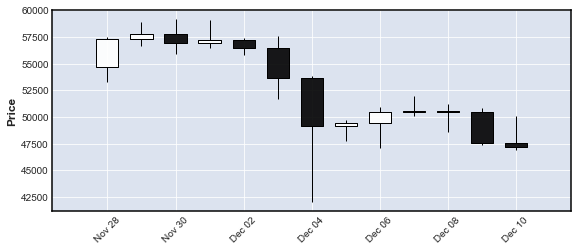

In [18]:
random_date = random.randint(0, len(list_validate_dates_invertedhammer)-1)
print(df.index.get_loc(list_validate_dates_invertedhammer[random_date]))
idx = df.index.get_loc(list_validate_dates_invertedhammer[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Hammer

1540


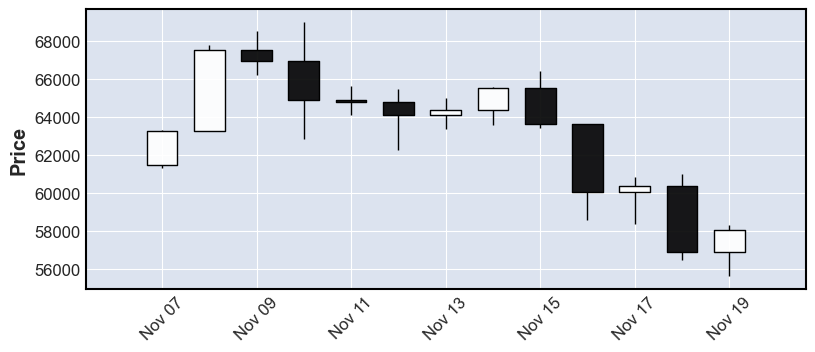

In [19]:
random_date = random.randint(0, len(list_validate_dates_hammer)-1)
print(df.index.get_loc(list_validate_dates_hammer[random_date]))
idx = df.index.get_loc(list_validate_dates_hammer[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Piercing

In [20]:
random_date = random.randint(0, len(list_validate_dates_piercing)-1)
print(df.index.get_loc(list_validate_dates_piercing[random_date]))
idx = df.index.get_loc(list_validate_dates_piercing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Morning Star

1847


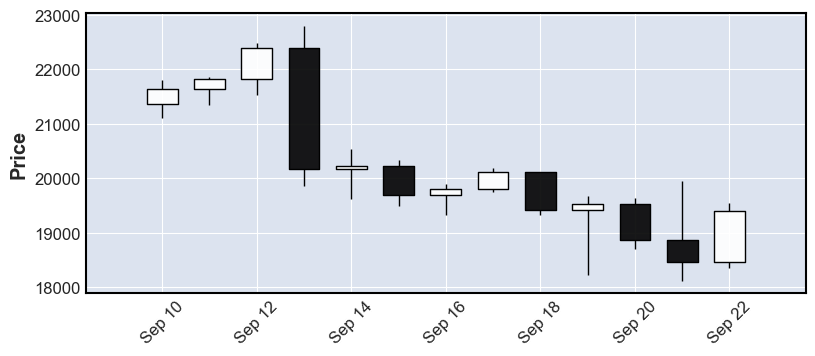

In [21]:
random_date = random.randint(0, len(list_validate_dates_morningstar)-1)
print(df.index.get_loc(list_validate_dates_morningstar[random_date]))
idx = df.index.get_loc(list_validate_dates_morningstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Bullish engulfing

467


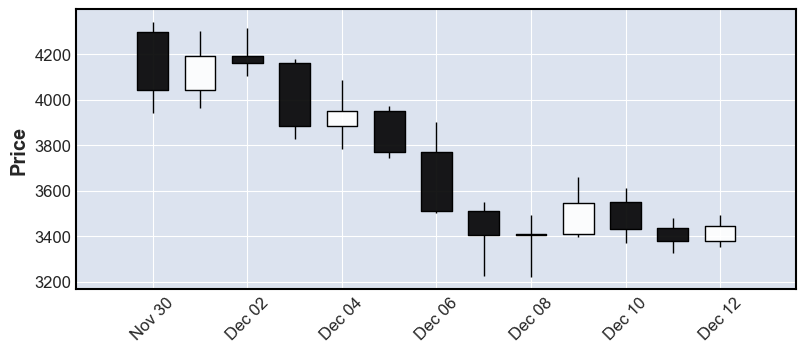

In [22]:
random_date = random.randint(0, len(list_validate_dates_bullishengulfing)-1)
print(df.index.get_loc(list_validate_dates_bullishengulfing[random_date]))
idx = df.index.get_loc(list_validate_dates_bullishengulfing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

### Get the dates from the bearish candlesticks patterns

In [23]:
list_dates_shootingstar = df[df['CDLSHOOTINGSTAR'] == -100]['formatted_open_time'].to_list()
list_dates_hangingman = df[df['CDLHANGINGMAN'] == -100]['formatted_open_time'].to_list()
list_dates_darkcloudcover = df[df['CDLDARKCLOUDCOVER'] == -100]['formatted_open_time'].to_list()
list_dates_eveningstar = df[df['CDLEVENINGSTAR'] == -100]['formatted_open_time'].to_list()
list_dates_bearishengulfing = df[df['CDLENGULFINGBEARISH'] == -100]['formatted_open_time'].to_list()

#### Get the amount of candlesticks patterns (before check)

In [24]:
print(f'BEFORE: number of shooting star:{len(list_dates_shootingstar)}')
print(f'BEFORE: number of hangingman:{len(list_dates_hangingman)}')
print(f'BEFORE: number of dark cloud cover:{len(list_dates_darkcloudcover)}')
print(f'BEFORE: number of evening star:{len(list_dates_eveningstar)}')
print(f'BEFORE: number of bearish engulfing:{len(list_dates_bearishengulfing)}')

BEFORE: number of shooting star:2
BEFORE: number of hangingman:21
BEFORE: number of dark cloud cover:0
BEFORE: number of evening star:3
BEFORE: number of bearish engulfing:75


#### Run the checks to identify the real candlesticks with reversal

In [25]:
list_validate_dates_shootingstar = []
list_new_sign_shootingstar = []
for date in list_dates_shootingstar:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_shootingstar.append(date)
        list_new_sign_shootingstar.append(-1)
    else:
        list_new_sign_shootingstar.append(0)                    

In [26]:
list_validate_dates_hangingman = []
list_new_sign_hangingman = []
for date in list_dates_hangingman:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_hangingman.append(date)
        list_new_sign_hangingman.append(-1)
    else:
        list_new_sign_hangingman.append(0)         

In [27]:
list_validate_dates_darkcloudcover = []
list_new_sign_darkcloudcover = []
for date in list_dates_darkcloudcover:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_darkcloudcover.append(date)
        list_new_sign_darkcloudcover.append(-1)
    else:
        list_new_sign_darkcloudcover.append(0)          

In [28]:
list_validate_dates_eveningstar = []
list_new_sign_eveningstar = []
for date in list_dates_eveningstar:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_eveningstar.append(date)
        list_new_sign_eveningstar.append(-1)
    else:
        list_new_sign_eveningstar.append(0)         

In [29]:
list_validate_dates_bearishengulfing = []
list_new_sign_bearishengulfing = []
for date in list_dates_bearishengulfing:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_bearishengulfing.append(date)
        list_new_sign_bearishengulfing.append(-1)
    else:
        list_new_sign_bearishengulfing.append(0)         

#### Get the amount of candlesticks patterns (after check)

In [30]:
print(f'AFTER: number of shooting star:{len(list_validate_dates_shootingstar)}')
print(f'AFTER: number of hangingman:{len(list_validate_dates_hangingman)}')
print(f'AFTER: number of dark cloud cover:{len(list_validate_dates_darkcloudcover)}')
print(f'AFTER: number of evening star:{len(list_validate_dates_eveningstar)}')
print(f'AFTER: number of bearish engulfoing:{len(list_validate_dates_bearishengulfing)}')

AFTER: number of shooting star:1
AFTER: number of hangingman:14
AFTER: number of dark cloud cover:0
AFTER: number of evening star:3
AFTER: number of bearish engulfoing:44


### Plot some results

#### Shooting Star

31


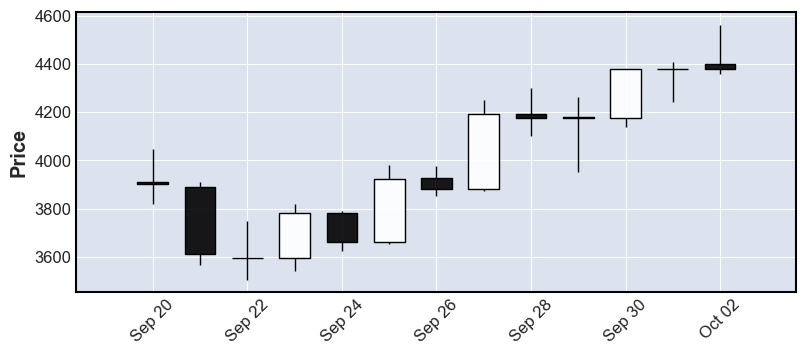

In [31]:
random_date = random.randint(0, len(list_validate_dates_shootingstar)-1)
print(df.index.get_loc(list_validate_dates_shootingstar[random_date]))
idx = df.index.get_loc(list_validate_dates_shootingstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Hangingman

969


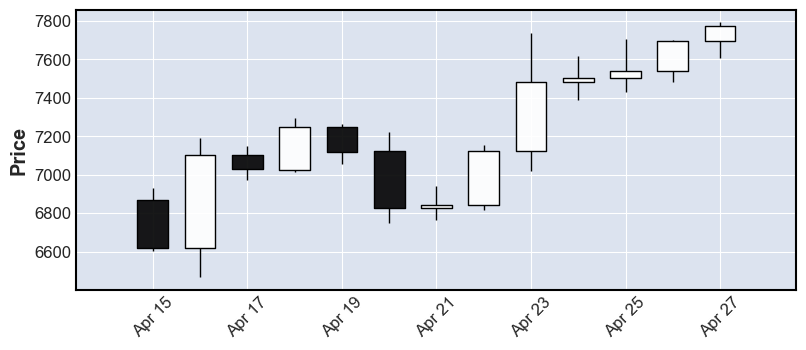

In [32]:
random_date = random.randint(0, len(list_validate_dates_hangingman)-1)
print(df.index.get_loc(list_validate_dates_hangingman[random_date]))
idx = df.index.get_loc(list_validate_dates_hangingman[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Dark Cloud Cover

In [33]:
random_date = random.randint(0, len(list_validate_dates_darkcloudcover)-1)
print(df.index.get_loc(list_validate_dates_darkcloudcover[random_date]))
idx = df.index.get_loc(list_validate_dates_darkcloudcover[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Evening Star

1734


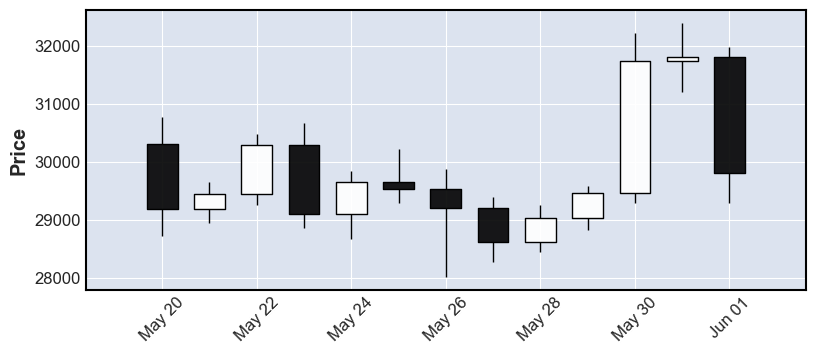

In [34]:
random_date = random.randint(0, len(list_validate_dates_eveningstar)-1)
print(df.index.get_loc(list_validate_dates_eveningstar[random_date]))
idx = df.index.get_loc(list_validate_dates_eveningstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Bearish Engulfing

664


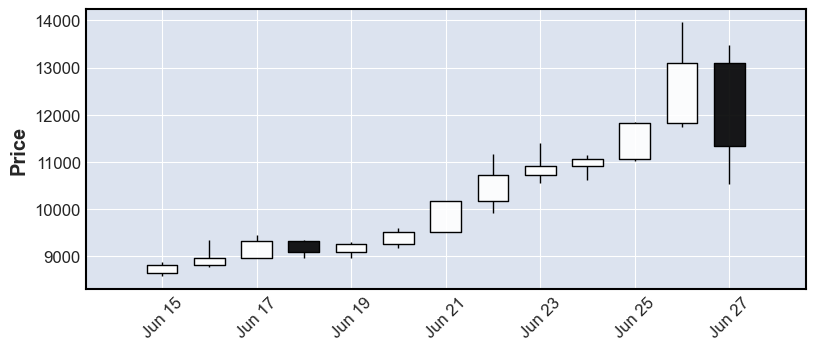

In [35]:
random_date = random.randint(0, len(list_validate_dates_bearishengulfing)-1)
print(df.index.get_loc(list_validate_dates_bearishengulfing[random_date]))
idx = df.index.get_loc(list_validate_dates_bearishengulfing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

## Create the Data with the validation

In [36]:
# list_new_column_name = ['CDLINVERTEDHAMMER_NEW', 'CDLHAMMER_NEW', 'CDLPIERCING_NEW', 'CDLMORNINGSTAR_NEW', 'CDLSHOOTINGSTAR_NEW', 'CDLHANGINGMAN_NEW', 'CDLDARKCLOUDCOVER_NEW', 'CDLEVENINGSTAR_NEW']
# list_of_list_valid_dates = [list_validate_dates_invertedhammer, list_validate_dates_hammer, list_validate_dates_piercing, list_validate_dates_morningstar, list_validate_dates_shootingstar, list_validate_dates_hangingman, list_validate_dates_darkcloudcover, list_validate_dates_eveningstar]
# list_of_list_new_sign = [list_new_sign_invertedhammer, list_new_sign_hammer, list_new_sign_piercing, list_new_sign_morningstar, list_new_sign_shootingstar, list_new_sign_hangingman, list_new_sign_darkcloudcover, list_new_sign_eveningstar]

list_new_column_name_pos = ['CDLINVERTEDHAMMER_NEW', 'CDLHAMMER_NEW', 'CDLPIERCING_NEW', 'CDLMORNINGSTAR_NEW', 'CDLENGULFINGBULLISH_NEW']
list_new_column_name_neg = ['CDLSHOOTINGSTAR_NEW', 'CDLHANGINGMAN_NEW', 'CDLDARKCLOUDCOVER_NEW', 'CDLEVENINGSTAR_NEW', 'CDLENGULFINGBEARISH_NEW']

list_of_list_valid_dates_pos = [list_validate_dates_invertedhammer, list_validate_dates_hammer, list_validate_dates_piercing, list_validate_dates_morningstar, list_validate_dates_bullishengulfing]
list_of_list_valid_dates_neg = [list_validate_dates_shootingstar, list_validate_dates_hangingman, list_validate_dates_darkcloudcover, list_validate_dates_eveningstar, list_validate_dates_bearishengulfing]

In [37]:
df.shape

(1948, 28)

In [38]:
for i in range(0, len(list_new_column_name_pos)):
    df[list_new_column_name_pos[i]] = np.where(df['formatted_open_time'].isin(list_of_list_valid_dates_pos[i]), 1, 0)

In [39]:
for i in range(0, len(list_new_column_name_neg)):
    df[list_new_column_name_neg[i]] = np.where(df['formatted_open_time'].isin(list_of_list_valid_dates_neg[i]), -1, 0)

In [40]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLINVERTEDHAMMER_NEW,CDLHAMMER_NEW,CDLPIERCING_NEW,CDLMORNINGSTAR_NEW,CDLENGULFINGBULLISH_NEW,CDLSHOOTINGSTAR_NEW,CDLHANGINGMAN_NEW,CDLDARKCLOUDCOVER_NEW,CDLEVENINGSTAR_NEW,CDLENGULFINGBEARISH_NEW
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2017-09-01,1504224000000,4689.89,4885.55,4654.88,4834.91,560.666366,1504310399999,2.665166e+06,4000,118.660103,...,0,0,0,0,0,0,0,0,0,0
2017-09-02,1504310400000,4796.16,4939.19,4286.87,4472.14,929.148595,1504396799999,4.257724e+06,7475,379.199863,...,0,0,0,0,0,0,0,0,0,0
2017-09-03,1504396800000,4508.50,4714.76,4298.33,4509.08,691.216198,1504483199999,3.121053e+06,6022,258.934536,...,0,0,0,0,0,0,0,0,0,0
2017-09-04,1504483200000,4505.00,4527.49,3972.51,4100.11,1394.644614,1504569599999,5.909947e+06,9317,578.600851,...,0,0,0,0,0,0,0,0,0,0
2017-09-05,1504569600000,4106.97,4484.99,3603.00,4366.47,1228.938157,1504655999999,5.083453e+06,10084,533.476065,...,0,0,0,0,0,0,0,0,0,0


### Check

In [41]:
df[df['CDLENGULFINGBEARISH_NEW'] == -1]

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLINVERTEDHAMMER_NEW,CDLHAMMER_NEW,CDLPIERCING_NEW,CDLMORNINGSTAR_NEW,CDLENGULFINGBULLISH_NEW,CDLSHOOTINGSTAR_NEW,CDLHANGINGMAN_NEW,CDLDARKCLOUDCOVER_NEW,CDLEVENINGSTAR_NEW,CDLENGULFINGBEARISH_NEW
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2018-01-11,1515628800000,14940.00,14968.68,11400.00,13238.78,33554.723751,1515715199999,4.465876e+08,239416,16422.019980,...,0,0,0,0,0,0,0,0,0,-1
2018-03-24,1521849600000,8898.04,8999.95,8491.00,8546.86,35466.609572,1521935999999,3.132548e+08,270300,17302.108090,...,0,0,0,0,0,0,0,0,0,-1
2018-06-21,1529539200000,6763.21,6795.00,6672.57,6718.84,25428.854048,1529625599999,1.711499e+08,159783,15152.496274,...,0,0,0,0,0,0,0,0,0,-1
2018-07-20,1532044800000,7468.86,7700.00,7273.00,7337.53,46140.313447,1532131199999,3.428627e+08,251391,24006.584622,...,0,0,0,0,0,0,0,0,0,-1
2018-10-17,1539734400000,6762.76,6811.12,6676.01,6740.89,26641.431379,1539820799999,1.796417e+08,158746,13752.475923,...,0,0,0,0,0,0,0,0,0,-1
2018-10-22,1540166400000,6590.12,6639.00,6535.27,6581.20,16213.692660,1540252799999,1.068150e+08,101673,8401.545594,...,0,0,0,0,0,0,0,0,0,-1
2018-11-14,1542153600000,6458.98,6482.84,5656.87,5922.41,46478.964003,1542239999999,2.796326e+08,319011,20429.546888,...,0,0,0,0,0,0,0,0,0,-1
2018-12-25,1545696000000,4010.11,4020.00,3646.41,3745.79,62725.629432,1545782399999,2.355843e+08,356377,31541.976272,...,0,0,0,0,0,0,0,0,0,-1
2019-01-20,1547942400000,3665.75,3693.73,3475.00,3539.28,27901.938598,1548028799999,9.976724e+07,204941,13875.111381,...,0,0,0,0,0,0,0,0,0,-1


## Export the Data

### Export parameters

In [42]:
export_path = "../data"
export_filename = "binance" + \
                  "_" + asset_ticket + \
                  "_" + timestamp + \
                  "_from_" + datetime.datetime.strptime(start_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_to_" + datetime.datetime.strptime(end_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_candlesticks_signals_processed"
export_extension = ".csv"
full_export_path = os.path.join(export_path, export_filename + export_extension)

### Export

In [43]:
df.to_csv(full_export_path, index=False)